## O(N) to O(1) engineering  
- currently we generate one image, drag that image back into inpainting, draw on that again
- since the generation process is the bottleneck, do the api calls parallely and generate the images
- since we already have the location of the masks, overlay the generated images in the marked regions
- this reduces the time complexity of the code to O(1)
- if each image requires 3 masks on average, this makes the total time go down to 33%
- time savings are huge for large dataset generation
- probably requires a batch api, or parallel(asynchronous) api calls 

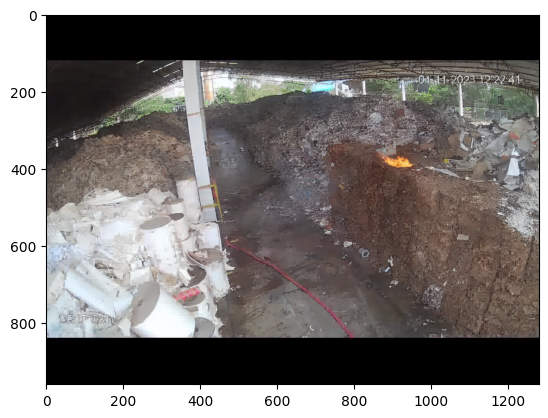

In [10]:
# print 0777_1.png using the opencv library
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv2.imread('./images/0777_1.png', cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# display the image
plt.imshow(img_rgb)

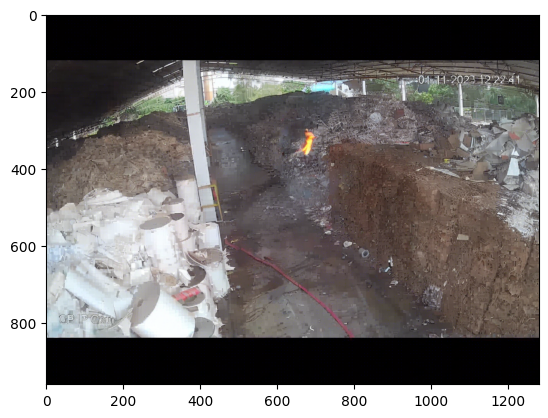

In [15]:
# load the second image and display it
# read the image
img_gen = cv2.imread('./images/0777_2.png', cv2.IMREAD_COLOR)
img_gen_rgb=cv2.cvtColor(img_gen, cv2.COLOR_BGR2RGB)
# display the image
plt.imshow(img_gen_rgb)

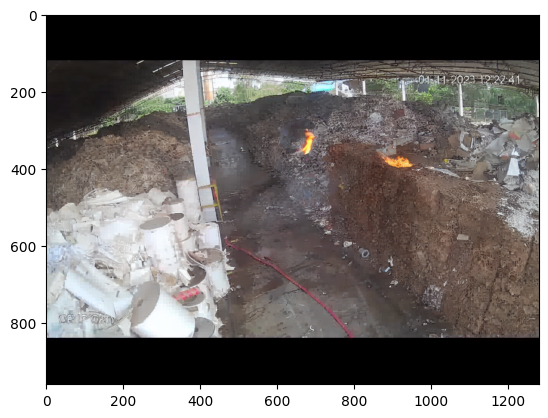

In [16]:
# in the masked region overlap the generated image with the original image
# and display the image

# load the mask and for every pixel that is black display generted image over original image
mask = cv2.imread('./masks/0777_2_mask.png', cv2.IMREAD_GRAYSCALE)

# display the mask
plt.imshow(mask, cmap='gray')

# create a copy of the original image
img_copy = img_rgb.copy()
# img_copy_rgb=cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
# for every pixel that is black in the mask, display the generated image
# over the original image
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i, j] == 0:
            img_copy[i, j] = img_gen_rgb[i, j]

# display the image

plt.imshow(img_copy)

In [18]:
# save the final generated image
cv2.imwrite('0777_final.png', cv2.cvtColor(img_copy, cv2.COLOR_RGB2BGR))

True